# Rocket to the Moon

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from physics.orbits import pos_earth_moon, orbital_period, compute_L2
from physics.dynamics import energy
from integrator import evolve
from plotting import plot_trajectories
from animate import animate_trajectories

<class 'astropy.units.quantity.Quantity'>


### Time Calculations

In [3]:
T = orbital_period() #s
time_step = 0.001 
max_time = 2*T 
time = np.arange(0, max_time, time_step) #s

### Calculate L2

In [4]:
pos_L2, v_L2 = compute_L2()

### Calculate rockets position and velocity by solving the ODE

In [5]:
r_rocket_barycenter, v_rocket_barycenter = evolve(pos_L2, v_L2, time, time_step, method='odeint')
r_rk4, v_rk4 = evolve(pos_L2, v_L2, time, time_step, method='RK4')
r_taylor, v_Taylor = evolve(pos_L2, v_L2, time, time_step, method='Taylor')

Using odeint integrator
Using RK4 integrator
Using Taylor integrator


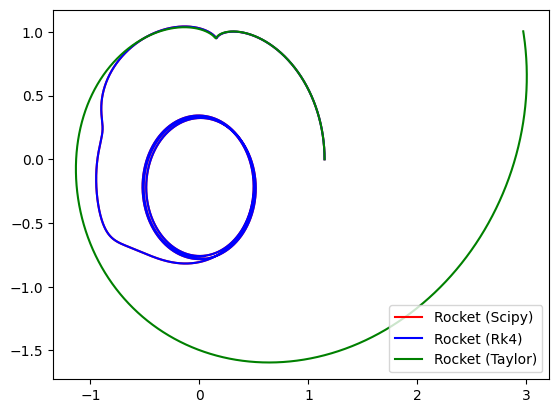

In [6]:
plt.plot(r_rocket_barycenter[0], r_rocket_barycenter[1], label='Rocket (Scipy)', color='red')
plt.plot(r_rk4[0], r_rk4[1], label='Rocket (Rk4)', color='blue')
plt.plot(r_taylor[0], r_taylor[1], label='Rocket (Taylor)', color='green')
plt.legend()
plt.show()

### Calcuate Earth and Moons Position

In [7]:
r_earth_barycenter, r_moon_barycenter = pos_earth_moon(time)

### Plot the results

In [8]:
plot_trajectories(r_earth_barycenter, r_moon_barycenter, r_rocket_barycenter)

In [ ]:
Energy = energy(r_rocket_barycenter, v_rocket_barycenter, time)

Rocket energy does not drop below 99% of initial energy in the simulated time.


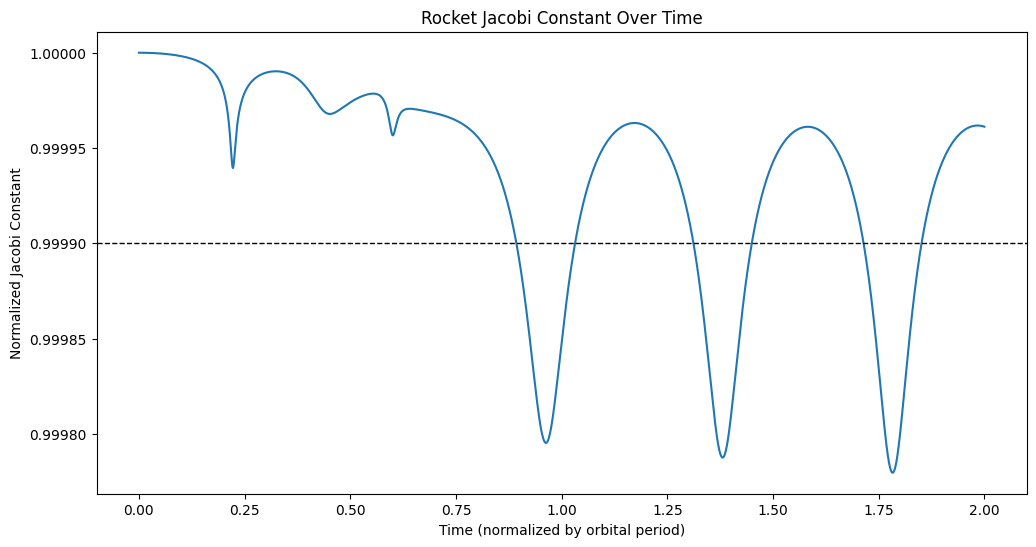

In [ ]:
#Find where energy drops below 99% of initial energy
below_99 = np.where(Energy / Energy[0] < 0.99)[0]
if len(below_99) > 0:
    first_below_99 = below_99[0]
    time_below_99 = time[first_below_99]
    print(f"Rocket energy drops below 99% of initial energy at t = {time_below_99} s")
else:
    print("Rocket energy does not drop below 99% of initial energy in the simulated time.")

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(time / T, Energy / Energy[0])
ax.axhline(y=0.9999, color='k', linestyle='--', linewidth=1)  # horizontal line at value 0.9999
#ax.axvline(x=time_below_99/T, color='r', linestyle='--', linewidth=1)  # vertical line at time when Jacobi constant drops below 99%
ax.set_xlabel("Time (normalized by orbital period)")
ax.set_ylabel("Normalized Jacobi Constant")
ax.set_title("Rocket Jacobi Constant Over Time")
plt.show()
